Зададим класс "Body" для определения физического тела в общем виде. У него будут исходные параметры: координаты по x и y, а также скорости по x и по y.

In [1]:
import math

MODEL_G = 9.81
MODEL_DT = 0.001

class Body:
    def __init__(self, x, y, vx, vy):
        """
        Создать тело.
        
        Пареметры:
        ----------
        x: float
            горизонтальная координата
        y: float
            вертикальная координата
        vx: float
            горизонтальная скорость
        vy: float
            вертикальная скорость
        """

        self.x = x
        self.y = y
        self.vx = vx
        self.vy = vy
        
        self.trajectory_x = [] # устанавливаем набор точек для определения траектории
        self.trajectory_y = [] # 
        

    def advance(self):
        """
        Выполнить шаг мат. модели применительно к телу, предварительно записав его координаты
        """
        self.trajectory_y.append(self.y) # записываем продвижение тела по вертикальной оси, обозначая траекторию
        self.trajectory_x.append(self.x) # то же самое, но по горизонтальной оси

        self.x += self.vx * MODEL_DT # За шаг DT увеличиваем значение координат в соответствии со скоростью по оси
        self.y += self.vy * MODEL_DT #
        self.vy -= MODEL_G * MODEL_DT # Моделируем движение в поле силы тяжести — ускорение свободного падения изменяет скорость тела по вертикальной оси

Далее определим особенный класс, обладающий свойствами физического тела, но с дополнительными параметрами: массой газа, изменением массы и скоростью газовой струи.

In [2]:
class Rocket(Body):
    def __init__(self, x, y, m, dmass, dgas):
        """
        Создать ракету.
        
        Пареметры:
        ----------
        x: float
            горизонтальная координата
        y: float
            вертикальная координата
        m: float
            масса ракеты в начальный момент
        dmass: float
            масса выброшенного газа за шаг
        dgas: float
            скорость выброшенного газа за шаг — ускорение при потере массы
        """
        super().__init__(x, y, 10, 10) # Вызовем конструктор предка — тела, т.к. он для ракеты актуален
        self.mass = m  # Добавляем характеристику ракете — массу
        self.dmass = dmass
        self.dgas = dgas

    def advance(self):
        super().advance() # вызовем метод предка — тела, т.к. и он для ракеты актуален.
        if self.mass >0:
            self.vx = -(self.vx - self.dgas ) * self.dmass / self.mass * math.sqrt(2)/ 2 # выражаем приращение скоростей при выгорании топлива
            self.vy = -(self.vy - self.dgas ) * self.dmass / self.mass * math.sqrt(2)/ 2 # 
            self.mass -= self.dmass  # моделируем потерю массы за шаг


Теперь время моделировать. С помощью библиотеки numpy построим траектории движения физического тела и ракеты при одинаковых начальных условиях.

In [3]:
import numpy as np

b = Body(0, 0, 10, 10)
r = Rocket(0, 0, 10, 3, 10) # отредактировали модель ракеты, теперь задаем начальные параметры: координаты x,y, начальная масса, расход массы за шаг и изменение скорости за шаг.
                            # таким образом, меняя количество выброшенного газа за шаг, мы меняем приращение скорости. Изменение скорости за шаг служит ускорением при потере массы. 

bodies = [b, r]
# Работаем со списком тел

for t in np.arange(0, 2, MODEL_DT): # для всех временных отрезков
    for b in bodies: # для всех тел
        b.advance() # выполним шаг
        

Визуализируем полученные траектории с помощью библиотеки matplotlib

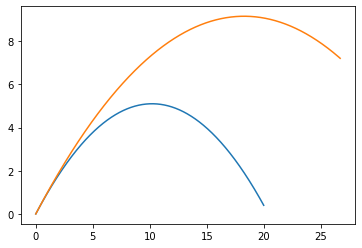

In [4]:
from matplotlib import pyplot as pp

for b in bodies: # для всех тел
    pp.plot(b.trajectory_x, b.trajectory_y) # нарисуем их траектории